In [45]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load in rats and mice



In [46]:
# ANIMALS
rats = ["R013", "R014", "R015"]
mice = [
    "R511",
    "R512",
    "R513",
    "R621",
    "R622",
    "R623",
    "R624",
]

rat_df = create_trials_df_from_dj(animal_ids=rats)
mouse_df = create_trials_df_from_dj(animal_ids=mice)
rat_df.loc[
    rat_df["cpoke_dur"] < 0, "cpoke_dur"
] = pd.NA  # todo- add to create trials df
# DATES
# date_min, date_max = dju.return_date_window(latest_date="2023-08-04", n_days_back=7)

fetched 21 sessions for R013 between 2023-07-14 and 2023-08-04
fetched 21 sessions for R014 between 2023-07-14 and 2023-08-04
fetched 21 sessions for R015 between 2023-07-14 and 2023-08-04
fetched 24 sessions for R511 between 2023-07-12 and 2023-08-04
fetched 24 sessions for R512 between 2023-07-12 and 2023-08-04
fetched 23 sessions for R513 between 2023-07-12 and 2023-08-04
fetched 10 sessions for R621 between 2023-07-26 and 2023-08-04
fetched 10 sessions for R622 between 2023-07-26 and 2023-08-04
fetched 10 sessions for R623 between 2023-07-26 and 2023-08-04
fetched 10 sessions for R624 between 2023-07-26 and 2023-08-04


In [95]:
rat_df = rat_df.reset_index(drop=True)
mouse_df = mouse_df.reset_index(drop=True)

N days to center poke for rats & mice



In [24]:
rat_df.query("stage < 5").groupby(["animal_id"]).date.nunique()

animal_id
R013    10
R014    11
R015    11
Name: date, dtype: int64

In [31]:
mouse_df.query("stage < 5").groupby(["animal_id"]).date.nunique()

animal_id
R511    23
R512    19
R513    18
R621    10
R622    10
R623    10
R624    10
Name: date, dtype: int64

In [62]:
def plot_failed_cpoke_timings(trials_df, ax, title="", xaxis_label=True):
    """
    TODO
    """
    sns.lineplot(
        data=trials_df,
        x="date",
        y="avg_settling_in",
        marker="o",
        ax=ax,
        color="orangered",
        hue="animal_id",
    )

    ax.set(ylabel="Duration [s]", xlabel="", title=title)
    ax.grid()
    pu.set_date_x_ticks(ax, xaxis_label)


def plot_valid_cpoke_timings(trials_df, ax, title="", xaxis_label=True):
    """
    TODO
    """
    sns.lineplot(
        data=trials_df,
        x="date",
        y="cpoke_dur",
        marker="o",
        ax=ax,
        color="lightgreen",
        hue="animal_id",
    )

    ax.set(ylabel="Duration [s]", xlabel="", title=title)
    ax.grid()
    pu.set_date_x_ticks(ax, xaxis_label)

Text(0.5, 1.0, 'Failed center pokes duration')

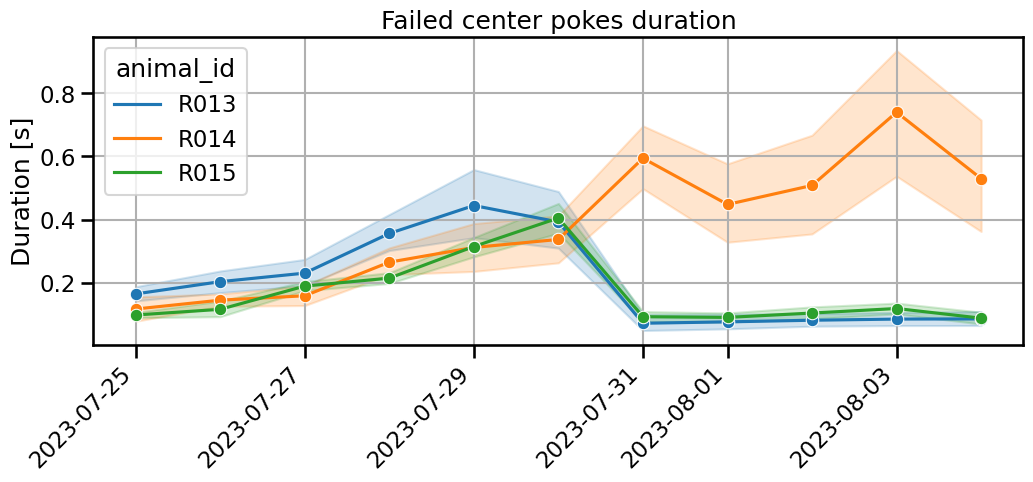

In [66]:
fig, ax = pu.make_fig()
plot_failed_cpoke_timings(rat_df, ax)
ax.set_title("Failed center pokes duration")

Text(0.5, 1.0, 'Valid center pokes duration')

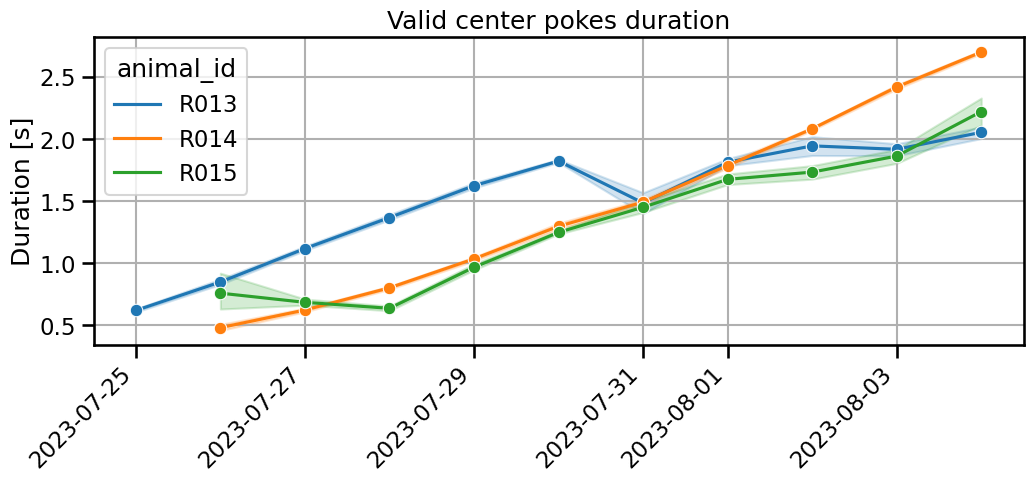

In [67]:
fig, ax = pu.make_fig()
plot_valid_cpoke_timings(rat_df, ax)
ax.set_title("Valid center pokes duration")

In [91]:
def plot_multi_cpoke_rate(trials_df, ax, title="", xaxis_label=True):
    """
    TODO
    """
    trials_df["multi_cpoke"] = trials_df["n_settling_ins"] > 1

    sns.lineplot(
        data=trials_df,
        x="date",
        y="multi_cpoke",
        ax=ax,
        marker="o",
        hue="animal_id",
    )

    # aesthetics
    ax.set(ylim=(-0.1, 1), ylabel="Multi Cpoke Rate", xlabel="")
    pu.set_date_x_ticks(ax, xaxis_label=xaxis_label)
    ax.grid()

    return None

Text(0.5, 1.0, "'Violation' Rate")

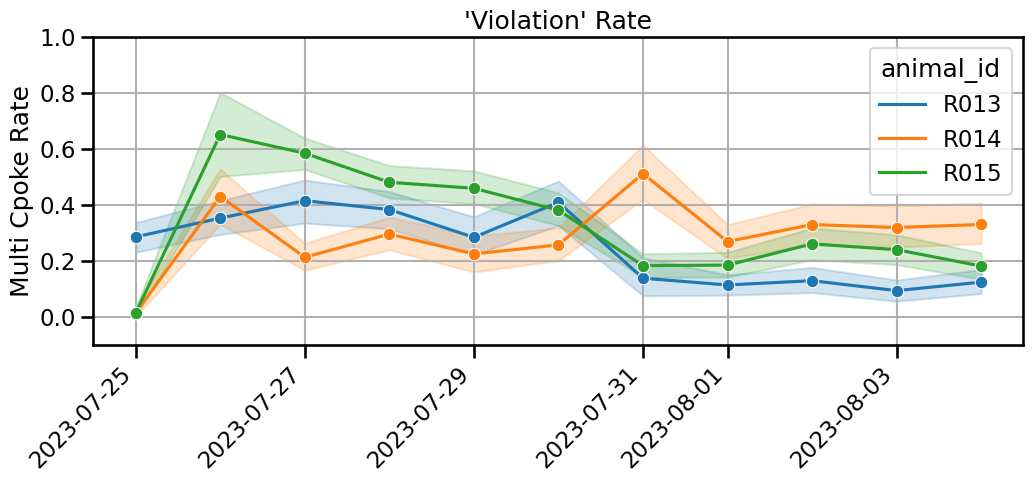

In [90]:
fig, ax = pu.make_fig()
date_min = pd.to_datetime("2023-07-25").date()
plot_multi_cpoke_rate(rat_df.query("date >= @date_min").copy(), ax)
ax.set_title("'Violation' Rate")

Text(0.5, 1.0, 'Valid center pokes duration')

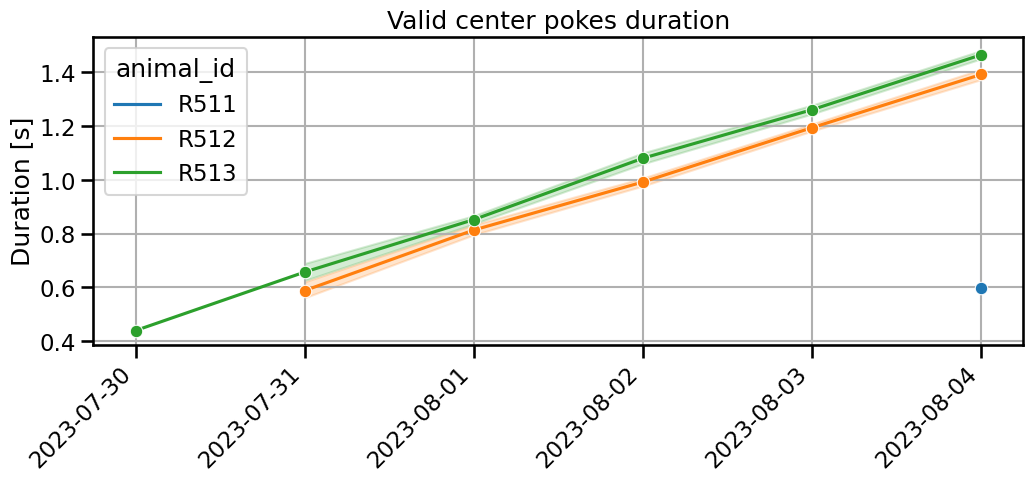

In [97]:
cpoke_mice = ["R511", "R512", "R513"]

fig, ax = pu.make_fig()
plot_valid_cpoke_timings(mouse_df.query("animal_id == @cpoke_mice"), ax)
ax.set_title("Valid center pokes duration")

Text(0.5, 1.0, "'Violation' Rate")

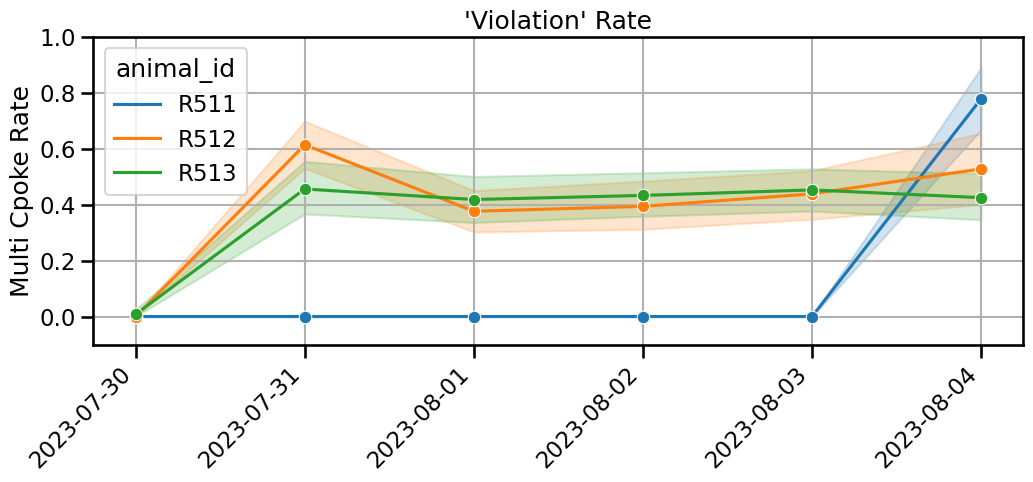

In [99]:
fig, ax = pu.make_fig()
date_min = pd.to_datetime("2023-07-30").date()
plot_multi_cpoke_rate(
    mouse_df.query("date >= @date_min & animal_id == @cpoke_mice").copy(), ax
)
ax.set_title("'Violation' Rate")